In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
'''Changes the directory to the main folder to import pipeline.py'''
import sys
sys.path.append('../')
from utils import *

import pandas as pd
import numpy as np

In [3]:
'''Read the dataframe with the remaining 374 S%P500 tickers'''
data_matrix = pd.read_csv('../data/interim/data_matrix.csv', skiprows=None)
data_matrix

,Ticker,01/03/00,01/04/00,01/05/00,01/06/00,01/07/00,01/10/00,01/11/00,01/12/00,01/13/00,...,08/19/20,08/20/20,08/21/20,08/24/20,08/25/20,08/26/20,08/27/20,08/28/20,08/31/20,09/01/20
0,AMZN,89.380,81.940,71.750,65.56,69.56,69.19,66.750,63.560,65.940,...,3260.48,3297.37,3284.72,3307.46,3346.49,3441.85,3400.00,3401.80,3450.96,3499.12
1,AZO,30.560,30.440,30.060,29.06,30.44,30.69,30.060,29.810,30.000,...,1210.00,1203.50,1209.07,1209.93,1201.66,1198.01,1195.89,1189.12,1196.31,1222.43
2,BBY,57.500,57.380,56.690,56.50,58.25,57.63,55.880,54.440,53.000,...,111.96,111.70,114.00,117.37,112.64,112.31,111.22,111.23,110.91,113.50
3,BKNG,51.250,54.000,59.940,57.50,57.25,54.25,52.810,51.130,51.630,...,1767.47,1768.69,1779.37,1834.44,1853.80,1866.97,1893.50,1945.25,1910.45,1928.86
4,BWA,38.690,38.690,38.880,38.38,39.44,39.00,38.880,38.810,39.060,...,41.01,40.66,40.59,41.38,41.00,41.53,40.76,41.43,40.59,41.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,PXD,8.438,8.563,8.563,8.50,8.75,8.50,8.625,8.188,8.438,...,104.77,102.67,102.11,104.75,106.92,104.41,105.38,105.60,103.93,102.98
370,SLB,54.940,54.190,54.880,57.75,58.81,59.38,60.690,59.190,60.880,...,19.72,18.77,18.58,19.55,19.26,18.67,18.70,19.42,19.01,18.63
371,VLO,19.130,18.940,19.810,20.25,20.00,19.94,19.630,19.750,19.940,...,54.26,52.70,52.62,54.99,54.25,53.70,53.44,54.89,52.59,52.47
372,WMB,31.000,30.310,32.000,32.88,33.75,33.13,32.750,32.310,33.060,...,21.65,21.40,21.41,21.68,21.39,21.05,20.96,21.07,20.76,20.96


# **General Matrix**

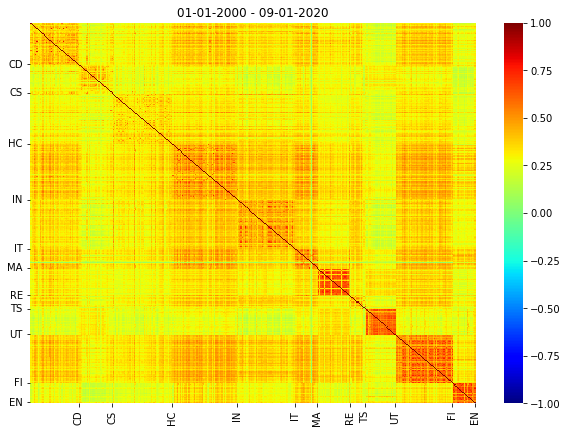

In [4]:
'''
Call the class with one of the following correlation definition:
 * Pearson: 'p', 'pearson', 'P'
 * Spearman Rank: 's', 'spearman', 'S'
 * Distance: 'd', 'distance', 'D'
'''
correlation_coeff = 'spearman'

'''Call the correlation class'''
corr = Correlation_Analysis(data_matrix, correlation_coeff)

'''Call the general heatmap function'''
corr.general_correlation_matrix()

'''Split the data matrix into epochs and calculate their respective correlation matrix'''
corr_matrices = corr.split_data_correlation()

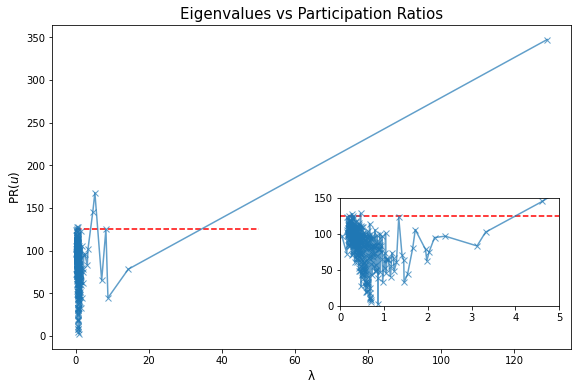

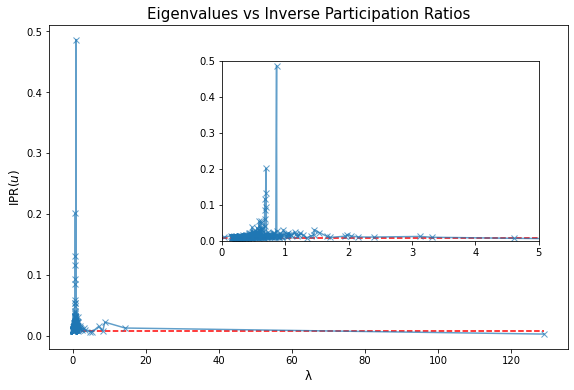

In [5]:
'''Call the eigenvalues and pr class'''
eig = Eig(corr)

eig.general_plots()

# **Moments per Epoch**

In [6]:
'''Call the moments class'''
moments = Moments(corr)

'''Calculate the moments per epoch and save them in a dataframe'''
moments.get_dataframe()
df_moments = moments.df
df_moments.head()

,ACC,STD,SKEW,KURT
0,0.125898,0.173612,0.012246,3.036322
1,0.150177,0.202004,0.091208,2.811937
2,0.115917,0.188959,0.148642,3.092561
3,0.067828,0.178723,0.093285,3.071128
4,0.082678,0.187934,0.103245,3.086376


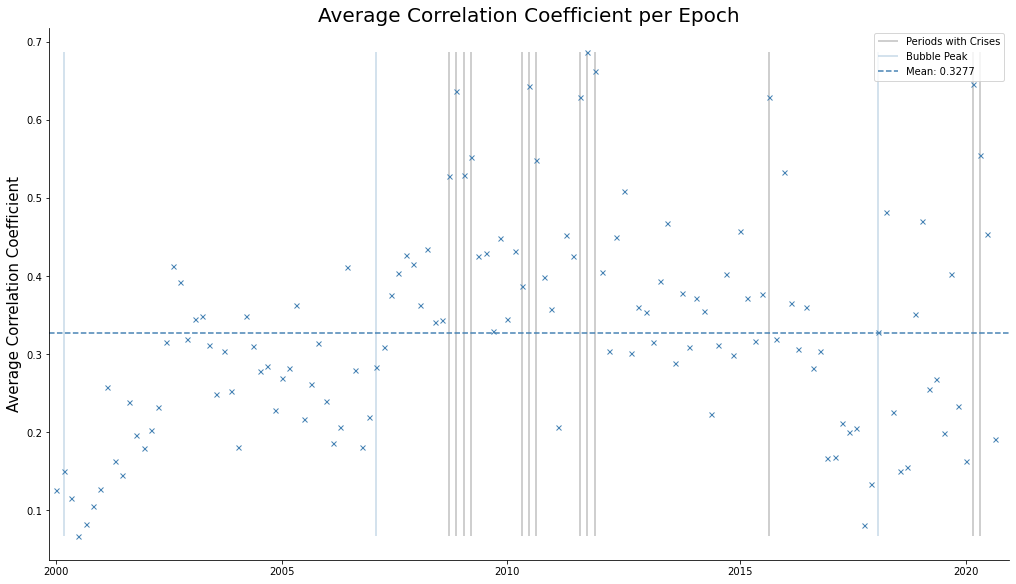

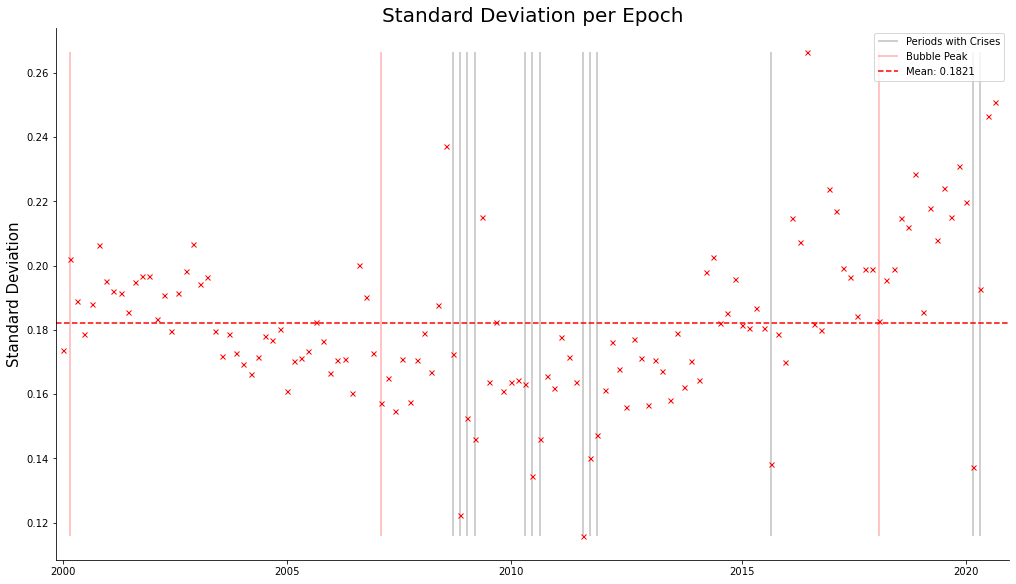

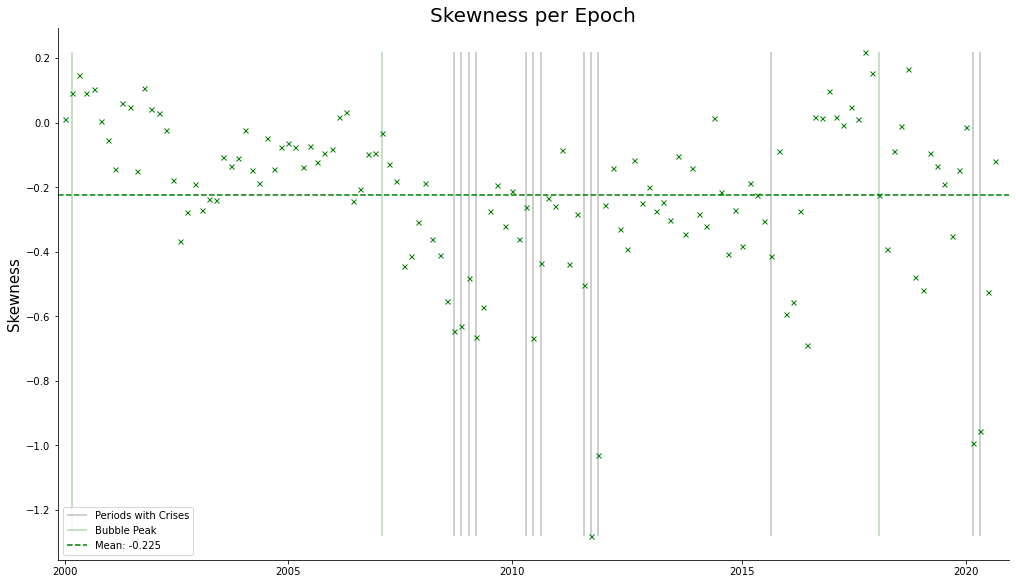

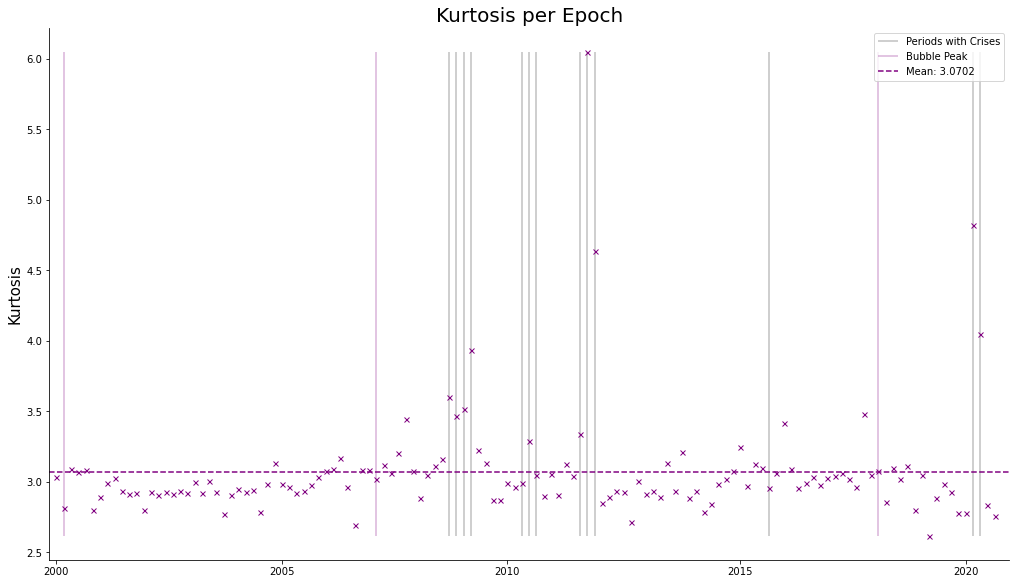

In [7]:
'''Plot the evoultion over time of each moment'''
moments.get_plot('acc')
moments.get_plot('std')
moments.get_plot('skew')
moments.get_plot('kurt')

Order 2;   r^2 score: 0.3074


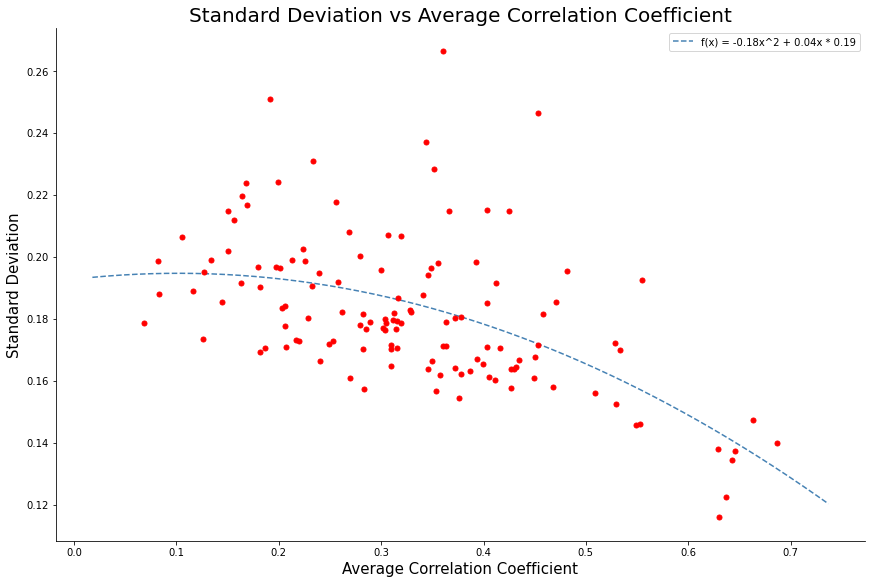

Order 2;   r^2 score: 0.7889


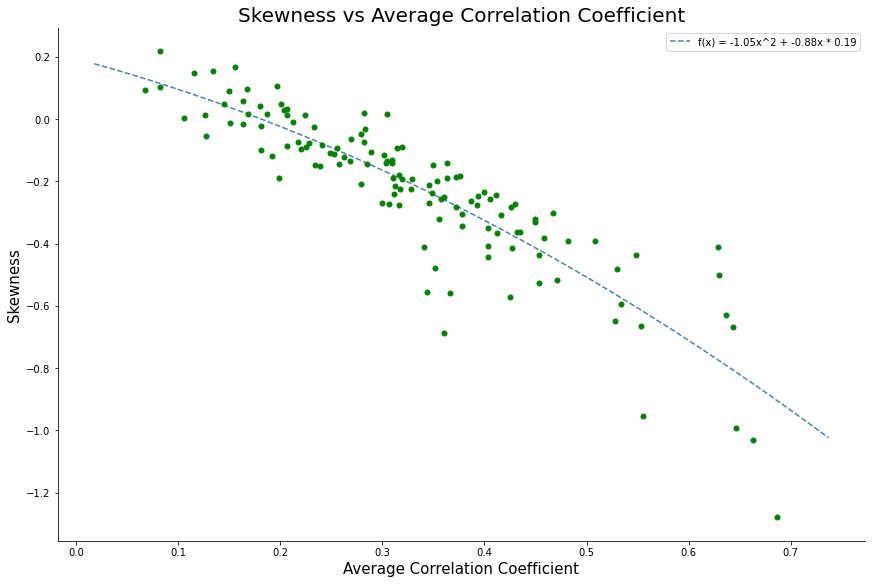

Order 2;   r^2 score: 0.5468


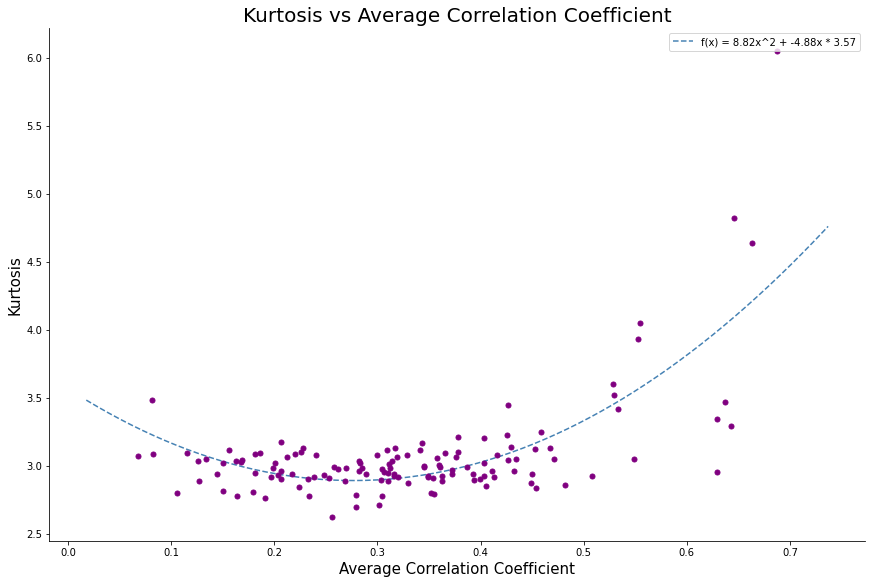

In [8]:
'''Plot the others moments againts the Average Correlation Coefficient'''
moments.get_plot('std','acc')
moments.get_plot('skew','acc')
moments.get_plot('kurt','acc')

# **Eigenvalues and Participation Ratios**

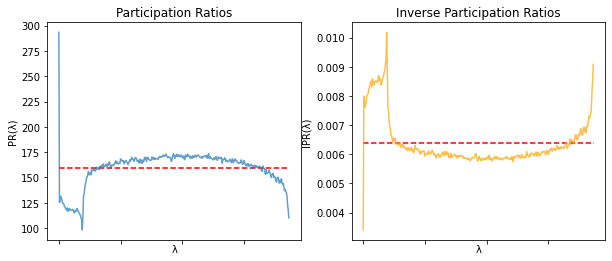

In [9]:
mean_pr = np.array(eig.pr).transpose().mean(axis=1)
mean_ipr = 1/mean_pr

'''Plot the mean pr and ipr values per eigenvalue for all the matrices'''
eig.pr_plots(mean_pr, mean_ipr)

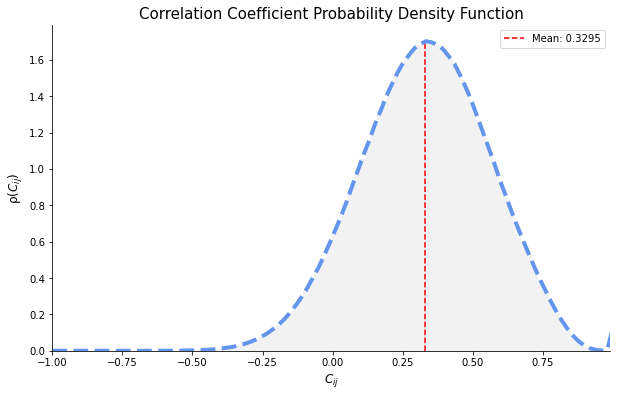

In [10]:
'''Plot the accumulated correlation coefficients all the epochs'''
eig.correlation_distribution(eig.corr_values)

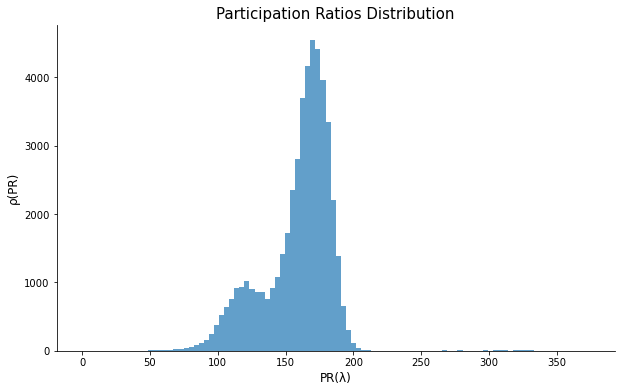

In [11]:
'''Plot the accumulated pr values distribution of all the epochs'''
eig.pr_distribution(eig.pr)

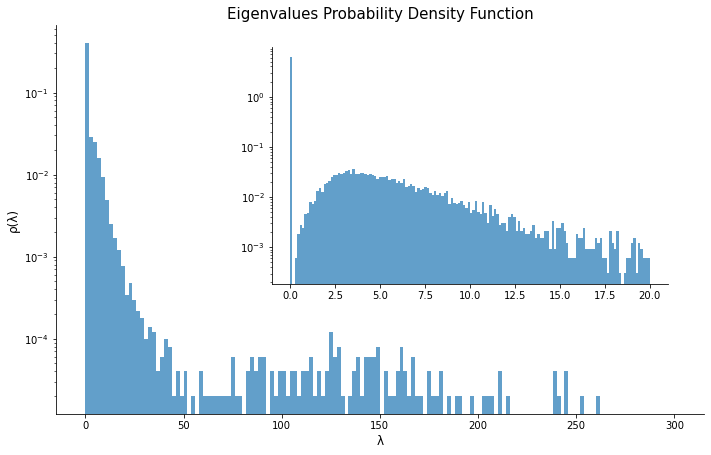

In [12]:
'''Plot the accumulated eigenvalues distribution of all the epochs'''
eig.eigvals_distribution(eig.eigenvalues)

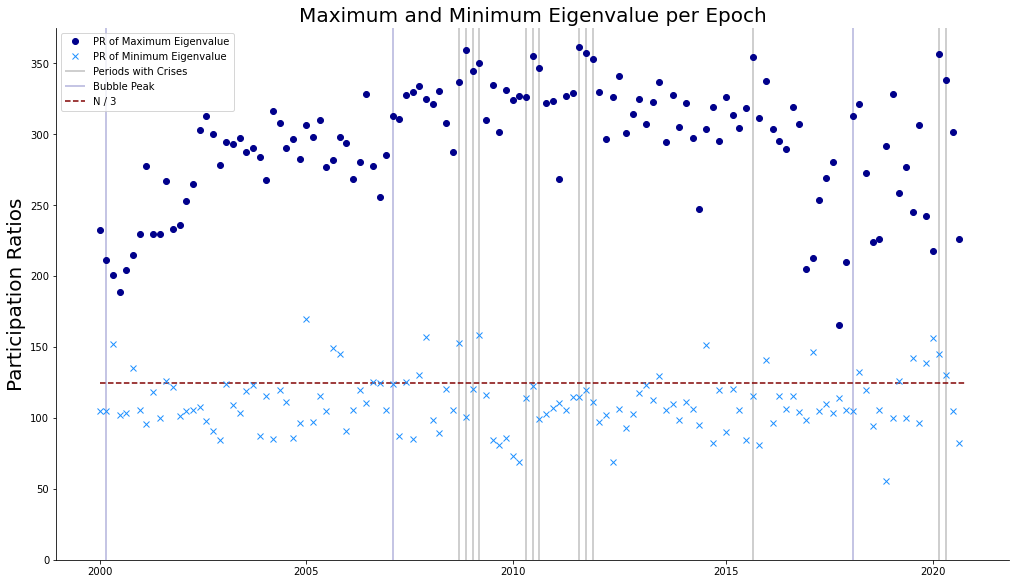

In [13]:
'''Plot the evoultion over time of pr values associated with the maximum and minimum eigenvalues'''
eig.pr_evolution()

# **Agglomerative Clustering**

Distance matrix loaded


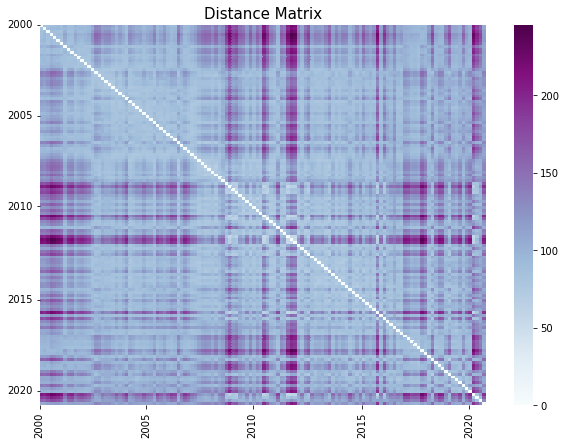

In [14]:
agg = Agglomerative_Clustering(corr, metric='l2')
agg.get_distance_matrix()

/mnt/c/Users/Eduar098/Documents/facultadUNAM/Tesis/toGit/sp500analysis/notebooks/../utils/clustering.py:61: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendogram = shc.dendrogram(shc.linkage(self._distance_matrix, method='ward'))


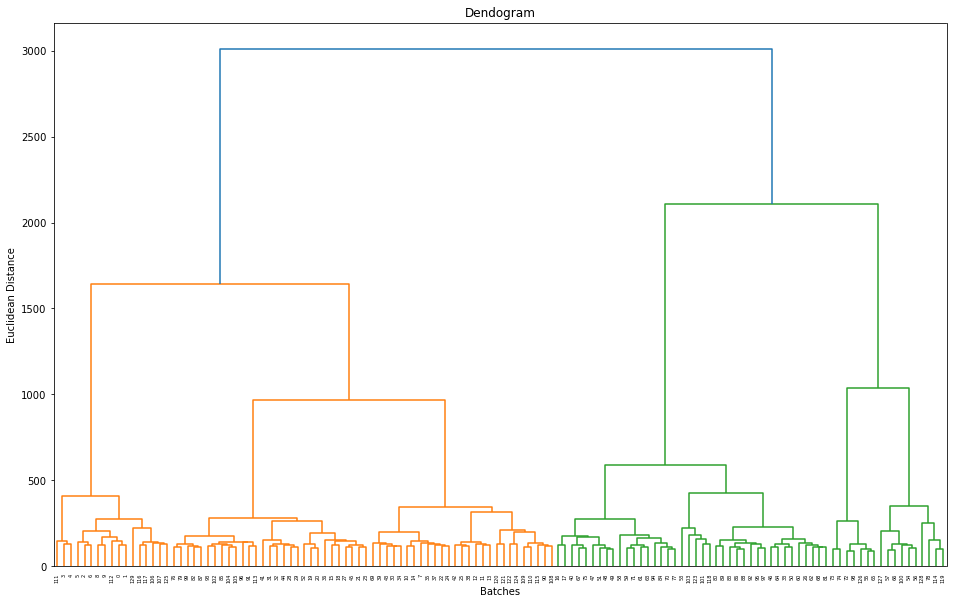

In [15]:
agg.plot_dendogram()

/home/j-e-s-h/anaconda3/envs/tesis/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


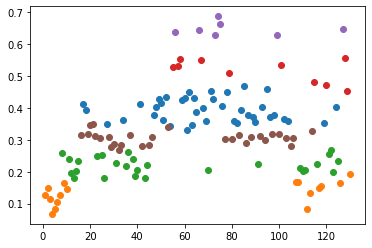

,Epoch,ACC,Cluster
0,1,0.125898,2
1,2,0.150177,2
2,3,0.115917,2
3,4,0.067828,2
4,5,0.082678,2
...,...,...,...
125,126,0.163903,2
126,127,0.646015,5
127,128,0.554833,4
128,129,0.453562,4


In [16]:
'''By using the maximum distance threshold, it is known the optimal clusters are '''
df_acc = pd.DataFrame(df_moments['ACC'], columns=['ACC'])
df_acc['Epoch'] = pd.Series(range(1,int(len(df_moments['ACC'])+1)))
df_acc = df_acc[['Epoch','ACC']]
df_clusters = agg.clustering(df_acc=df_acc, threshold=600)
df_clusters

**Note.** Here, by using the sklearn function we might have a problem with the understanding of how the states are distributed. To solve that, we should do this manually.

In [17]:
'''An easy way to visualize some properties for each cluster'''
df_clusters.groupby('Cluster')['ACC'].agg([min,max,'mean','count'])

,min,max,mean,count
Cluster,,,,
1,0.329390,0.467463,0.393888,40
2,0.067828,0.191419,0.135137,17
3,0.179916,0.268346,0.221038,27
4,0.453562,0.554833,0.516218,10
5,0.629084,0.686968,0.647807,7
6,0.269145,0.348982,0.306498,29


With this new info, it's easy to rearrange the number of states to how we want to show them.

We will make three cases, one by correlation coefficient, whose work to see how the distribution of the states was done previously.

In [18]:
'''
Organize the clusters. The following if clause goes in the next order:
  - Pearson  ->  number of clusters = 7
  - Spearman  ->  number of clusters = 6
  - Distance  ->  number of clusters = 5
'''
df_final = df_clusters.copy()
df_final['Cluster'] = df_final['Cluster'].replace([1,3,5,7,4,2,6], 
                                                  [7,6,5,4,3,2,1])
'''Save the rearranged dataframe'''
df_final = df_final.sort_values(by=['ACC'], ascending=False)
df_final

,Epoch,ACC,Cluster
73,74,0.686968,5
74,75,0.663026,5
126,127,0.646015,5
65,66,0.643162,5
55,56,0.636715,5
...,...,...,...
2,3,0.115917,2
5,6,0.105860,2
4,5,0.082678,2
111,112,0.081849,2


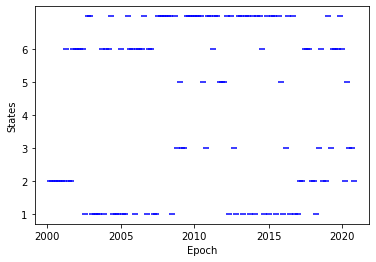

,min,max,mean,count
Cluster,,,,
7,0.329390,0.467463,0.393888,40
6,0.179916,0.268346,0.221038,27
5,0.629084,0.686968,0.647807,7
3,0.453562,0.554833,0.516218,10
2,0.067828,0.191419,0.135137,17
1,0.269145,0.348982,0.306498,29


In [19]:
'''Scatterplot with a correct distribution of states'''
fig, ax = plt.subplots()
plt.scatter(df_final['Epoch'], df_final['Cluster'],
            marker="_", c='Blue')
ax.set_yticks(range(1,len(df_final['Cluster'].unique())+1))
ax.set_yticklabels(range(1,len(df_final['Cluster'].unique())+1))
ax.set_xticks([0,31,62,94,125])
ax.set_xticklabels([2000,2005,2010,2015,2020])
ax.set_ylabel('States')
ax.set_xlabel('Epoch')
plt.show()

df_final.groupby('Cluster')['ACC'].agg([min,max,'mean','count']).sort_index(ascending=False)

In [20]:
'''Show the epochs with the highest ACC'''
df_final[df_final['Cluster']==np.max(df_final['Cluster'])].reset_index()

,index,Epoch,ACC,Cluster
0,84,85,0.467463,7
1,94,95,0.458317,7
2,70,71,0.453083,7
3,77,78,0.449822,7
4,61,62,0.449171,7
5,51,52,0.434839,7
6,63,64,0.432095,7
7,59,60,0.429941,7
8,48,49,0.426494,7
9,71,72,0.426373,7
